In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Loading the builder summary data set and viewing top 10 rows of dataframe 
df_mak = pd.read_excel(r'C:\Users\mdyoung\OneDrive - Bankers Financial Corporation\Desktop\Bellevue\DSC680_T301_2245_1 - Applied Data Science\Weeks 5 - 8\mak_table.xlsx')
df_mak.head(10)

,CertificateNumber,WarrantyEnrollmentAppID,ClosingDate,ActivatedAt,FormattedPurchasePrice,BuilderNumber,Company Name,BuilderApprovalDate,StateId,ZipCode,County,ProductSegment,Premium
0,W10657342,657342,2023-06-02 05:00:00,2024-02-28 15:27:10.735,1600000.00,23093,11/11 Developers LLC,2023-03-30,TX,75229,Dallas,Core,5200
1,1113400,685163,2023-03-27 00:00:00,2023-05-30 00:00:00.000,1450000.00,23093,11/11 Developers LLC,2023-03-30,TX,75229,Dallas,Classic,5655
2,W10701958,701958,2024-02-27 06:00:00,2024-03-14 21:09:02.635,1555000.00,23093,11/11 Developers LLC,2023-03-30,TX,75229,Dallas,Core,5054
3,1104252,674932,2022-12-09 00:00:00,2023-01-09 00:00:00.000,345000.00,22253,11/11 Developers LLC,2022-10-31,TX,78602,Bastrop,Classic,1121
4,W10701820,701820,2024-02-28 06:00:00,2024-03-21 14:05:14.343,367000.00,22253,11/11 Developers LLC,2022-10-31,TX,78602,Bastrop,Core,1193
5,1094094,313666,2022-05-15 00:00:00,2022-09-21 00:00:00.000,310063.00,7627,First Choice Home Builders,2007-08-28,OH,45601,Ross,Classic,620
6,1103435,313668,2022-09-12 00:00:00,2022-12-28 00:00:00.000,224817.00,7627,First Choice Home Builders,2007-08-28,OH,43107,Fairfield,Classic,450
7,1098826,426337,2022-07-29 00:00:00,2022-11-07 00:00:00.000,217785.00,7627,First Choice Home Builders,2007-08-28,OH,45644,Ross,Classic,436
8,1094291,448835,2022-05-15 00:00:00,2022-09-21 00:00:00.000,666580.00,7627,First Choice Home Builders,2007-08-28,OH,43138,Hocking,Classic,1333
9,1098808,458452,2022-07-15 00:00:00,2022-11-07 00:00:00.000,375569.75,7627,First Choice Home Builders,2007-08-28,OH,45644,Ross,Classic,751


In [61]:
# Viewing summary of builder data
df_mak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40191 entries, 0 to 40190
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CertificateNumber        40191 non-null  object        
 1   WarrantyEnrollmentAppID  40191 non-null  int64         
 2   ClosingDate              39901 non-null  datetime64[ns]
 3   ActivatedAt              40191 non-null  datetime64[ns]
 4   FormattedPurchasePrice   40115 non-null  float64       
 5   BuilderNumber            40191 non-null  int64         
 6   Company Name             40191 non-null  object        
 7   BuilderApprovalDate      40175 non-null  datetime64[ns]
 8   StateId                  40191 non-null  object        
 9   ZipCode                  40191 non-null  object        
 10  County                   40185 non-null  object        
 11  ProductSegment           40191 non-null  object        
 12  Premium                  40191 n

In [62]:
# Viewing stat summary for builder data
df_mak.describe().T

,count,mean,min,25%,50%,75%,max,std
WarrantyEnrollmentAppID,40191.0,631823.399592,305774.0,654932.5,679809.0,690461.5,706396.0,103170.935688
ClosingDate,39901,2023-05-07 18:09:41.038069248,2001-05-25 04:00:00,2022-12-21 00:00:00,2023-05-05 00:00:00,2023-09-15 04:00:00,2026-06-28 00:00:00,NaN
ActivatedAt,40191,2023-06-08 07:23:44.749024512,2022-09-06 00:00:00,2023-01-18 00:00:00,2023-05-31 00:00:00,2023-10-23 19:35:12.892499968,2024-03-22 21:31:29.272000,NaN
FormattedPurchasePrice,40115.0,476463.426457,0.0,327022.0,405000.0,539414.5,16518000.0,278596.323896
BuilderNumber,40191.0,51565899.184096,124.0,13104.0,16439.0,22086.0,230000018115.0,3441449294.095469
BuilderApprovalDate,40175,2011-11-30 23:53:45.797137664,1993-04-20 00:00:00,2008-02-20 00:00:00,2014-10-13 00:00:00,2018-03-05 00:00:00,2024-03-20 00:00:00,NaN
Premium,40191.0,540.616108,0.0,173.0,341.0,755.0,14350.0,619.101711


In [63]:
# Loading the cent data set and viewing dataframe. 
df_cent = pd.read_excel(r'C:\Users\mdyoung\OneDrive - Bankers Financial Corporation\Desktop\Bellevue\DSC680_T301_2245_1 - Applied Data Science\Weeks 5 - 8\cent_table.xlsx')
df_cent.head(10)

,ContractNumber,DealerNumber,DealerName,ProductDescription,ManufacturerDescription,ModelNumber,StateCode,ReceivedDate,EffectiveDate,PurchaseDate,...,ContractTerm,ContractType,WarrantyType,ServiceType,ContractCostAmount,ProductRetailAmount,ClaimAmount,Loss Date,ProductGroup,PWCProductGroup
0,AU48094,56596 A,BON MARCHE APPLIANCE CENTER,MICROWAVE,FRIGIDAIRE,FGMV17WNVF,LA,2021-09-30,2022-09-19,2021-09-18,...,3,Replace,Repl.,In Shop,23.15,298.00,0.0,NaN,Appliance,All Other Appliance
1,AU48115,56596 A,BON MARCHE APPLIANCE CENTER,MICROWAVE,FRIGIDAIRE,FFMV1845VS,LA,2021-09-30,2022-09-18,2021-09-17,...,3,Replace,Repl.,In Shop,23.15,248.00,0.0,NaN,Appliance,All Other Appliance
2,AU49973,57054 A,BOBCAT HOME FURNISHINGS CO,FREEZER,GALANZ,GLF70CWED0,MT,2021-09-30,2022-09-18,2021-09-17,...,3,Replace,Repl.,In Shop,20.15,289.99,0.0,NaN,Appliance,All Other Appliance
3,AU48097,56596 A,BON MARCHE APPLIANCE CENTER,FREEZER,ASCOLI,ACCF0700W1,LA,2021-09-30,2022-08-27,2021-08-26,...,2,Replace,Repl.,In Shop,14.01,218.00,0.0,NaN,Appliance,All Other Appliance
4,AU47695,56181 A,LYONS APPLIANCE,FREEZER,FRIGIDAIRE,FFCS0722AW,IA,2021-09-30,2021-09-30,2021-09-30,...,5,Repair,Serv.,On Site,64.72,349.00,0.0,NaN,Appliance,All Other Appliance
5,AU47946,56464 A,RW MCDONALD AND SONS,REFRIGERATOR,GE,GNE25JMKES,PA,2021-09-30,2021-09-30,2021-09-30,...,5,Repair,Serv.,On Site,114.33,1800.00,0.0,NaN,Appliance - Refrig,Appliance
6,AU48170,56694 A,CHAVIS FURNITURE,REFRIGERATOR,GE,GNE27JYMFS,AL,2021-09-30,2021-09-30,2021-09-30,...,5,Repair,Serv.,On Site,114.33,1959.00,0.0,NaN,Appliance - Refrig,Appliance
7,AU48171,56694 A,CHAVIS FURNITURE,RANGE,SAMSUNG,NX58T7511S,AL,2021-09-30,2021-09-30,2021-09-30,...,5,Repair,Serv.,On Site,59.28,829.00,0.0,NaN,Appliance,All Other Appliance
8,AU47753,56204 A,NIX HOME CENTER,REFRIGERATOR,GE,GSS25GMHES,AR,2021-09-30,2021-09-30,2021-09-30,...,5,Repair,Serv.,On Site,114.33,1599.00,0.0,NaN,Appliance - Refrig,Appliance
9,AU48169,56694 A,CHAVIS FURNITURE,REFRIGERATOR,WHIRLPOOL,WRS321SDHW,AL,2021-09-30,2021-09-30,2021-09-30,...,5,Repair,Serv.,On Site,97.32,1399.00,0.0,NaN,Appliance - Refrig,Appliance


In [64]:
# Viewing summary of appliance data
df_cent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561962 entries, 0 to 561961
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ContractNumber           561962 non-null  object        
 1   DealerNumber             561962 non-null  object        
 2   DealerName               561962 non-null  object        
 3   ProductDescription       561962 non-null  object        
 4   ManufacturerDescription  561962 non-null  object        
 5   ModelNumber              561953 non-null  object        
 6   StateCode                561962 non-null  object        
 7   ReceivedDate             561962 non-null  datetime64[ns]
 8   EffectiveDate            561962 non-null  datetime64[ns]
 9   PurchaseDate             561962 non-null  datetime64[ns]
 10  Year                     561962 non-null  int64         
 11  ExpirationDate           561962 non-null  object        
 12  ContractTerm    

In [65]:
# Viewing stat summary for appliance data
df_cent.describe().T

,count,mean,min,25%,50%,75%,max,std
ReceivedDate,561962,2020-08-18 16:54:14.773809920,2019-01-02 00:00:00,2020-01-25 00:00:00,2020-09-07 00:00:00,2021-04-02 00:00:00,2021-09-30 00:00:00,NaN
EffectiveDate,561962,2020-07-13 12:01:45.777970176,2019-01-01 00:00:00,2019-12-05 00:00:00,2020-07-31 00:00:00,2021-03-04 00:00:00,2023-08-29 00:00:00,NaN
PurchaseDate,561962,2020-07-09 08:35:57.429861888,2019-01-01 00:00:00,2019-12-03 00:00:00,2020-07-28 00:00:00,2021-02-28 00:00:00,2021-09-30 00:00:00,NaN
Year,561962.0,2020.04069,2019.0,2019.0,2020.0,2021.0,2021.0,0.774373
ContractTerm,561962.0,4.70792,1.0,5.0,5.0,5.0,5.0,0.786689
ContractCostAmount,561962.0,75.458236,3.84,57.04,69.63,92.21,703.41,33.728644
ProductRetailAmount,561962.0,1279.801189,0.0,679.0,909.0,1519.99,18999.0,1091.018191
ClaimAmount,561962.0,10.762085,0.0,0.0,0.0,0.0,10068.81,57.943497
Loss Date,25791.0,44450.415106,36892.0,44310.5,44487.0,44620.0,44776.0,251.382437


In [66]:
# Initial cleaning steps (e.g., dropping duplicates, handling missing values)
df_mak.drop_duplicates(inplace=True)
df_cent.drop_duplicates(inplace=True)

In [67]:
df_mak.shape

(40191, 13)

In [68]:
df_cent.shape

(561962, 22)

In [69]:
# Convert state identifiers to the same format 
df_mak['StateId'] = df_mak['StateId'].astype(str).str.upper().str.strip()
df_cent['StateCode'] = df_cent['StateCode'].astype(str).str.upper().str.strip()

Aggregating the data to calculate the total premiums and contract cost amounts per state:

In [70]:
# Aggregate premiums by state in both datasets
total_premiums_mak = df_mak.groupby('StateId')['Premium'].sum().reset_index(name='Total_Premiums_mak')
total_premiums_cent = df_cent.groupby('StateCode')['ContractCostAmount'].sum().reset_index(name='Total_Premiums_cent')

In [71]:
# Merge the aggregated data on state
combined_premiums = pd.merge(total_premiums_mak, total_premiums_cent, left_on='StateId', right_on='StateCode', how='inner')

In [72]:
# Dropping redundant column and rename columns for clarity
combined_premiums.drop('StateCode', axis=1, inplace=True)
combined_premiums.rename(columns={'StateId': 'State'}, inplace=True)

In [73]:
# Display the resulting DataFrame
print(combined_premiums.head())

  State  Total_Premiums_mak  Total_Premiums_cent
0    AL              257816           1238891.75
1    AR               13811            961754.57
2    AZ              103800            306506.44
3    CA              266489           7346257.04
4    CO               40537             50544.86


In [74]:
# Calculate combined total for sorting purpose
combined_premiums['Combined_Total'] = combined_premiums['Total_Premiums_mak'] + combined_premiums['Total_Premiums_cent']

# Sort the DataFrame by combined total in descending order
combined_premiums_sorted = combined_premiums.sort_values('Combined_Total', ascending=False)

# Remove the 'Combined_Total' column 
combined_premiums_sorted.drop('Combined_Total', axis=1, inplace=True)


<Figure size 1440x1080 with 0 Axes>

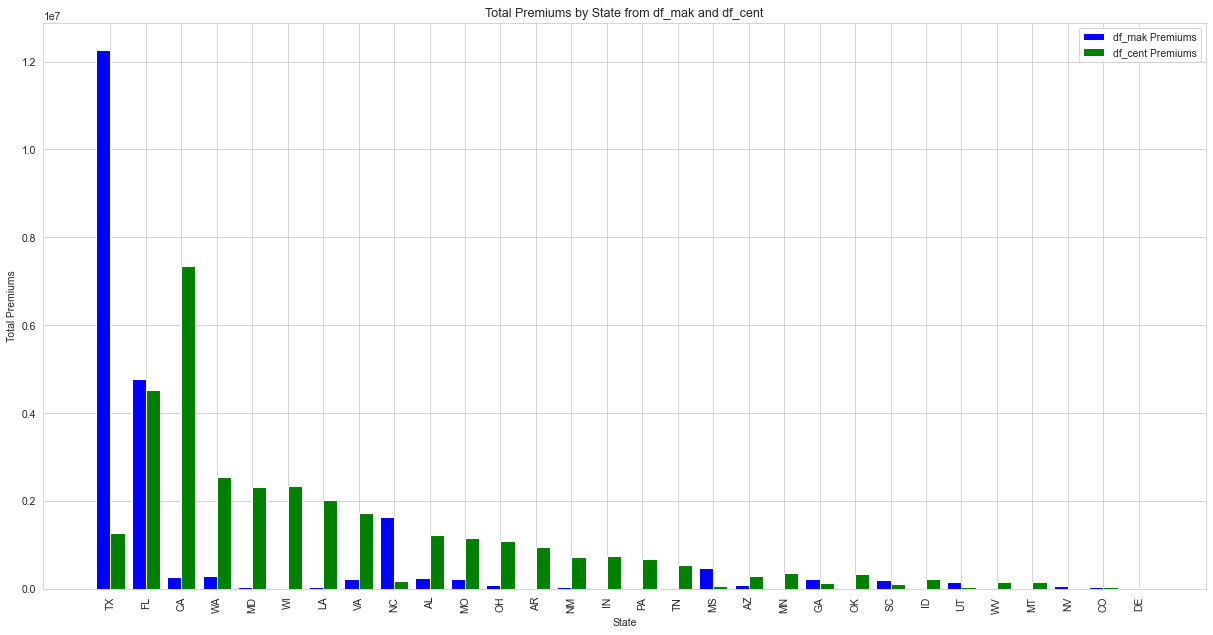

In [75]:
# Create a grouped bar chart
plt.figure(figsize=(20, 15))  # Set the figure size for better readability

# Plotting
bar_width = 0.4  # width of bars
index = range(len(combined_premiums_sorted))  # the label locations

fig, ax = plt.subplots(figsize=(20, 10), dpi=75)
bars1 = ax.bar(index, combined_premiums_sorted['Total_Premiums_mak'], bar_width, label='df_mak Premiums', color='blue')
bars2 = ax.bar([p + bar_width for p in index], combined_premiums_sorted['Total_Premiums_cent'], bar_width, label='df_cent Premiums', color='green')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('State')
ax.set_ylabel('Total Premiums')
ax.set_title('Total Premiums by State from df_mak and df_cent')
ax.set_xticks([p + bar_width / 2 for p in index])  # Positioning x-ticks in the center of the groups
ax.set_xticklabels(combined_premiums_sorted['State'], rotation=90)
ax.legend()

plt.show()


In [76]:
combined_premiums['Combined_Total_Premiums'] = combined_premiums['Total_Premiums_mak'] + combined_premiums['Total_Premiums_cent']


In [77]:
top_states = combined_premiums.sort_values(by='Combined_Total_Premiums', ascending=False).head(5)


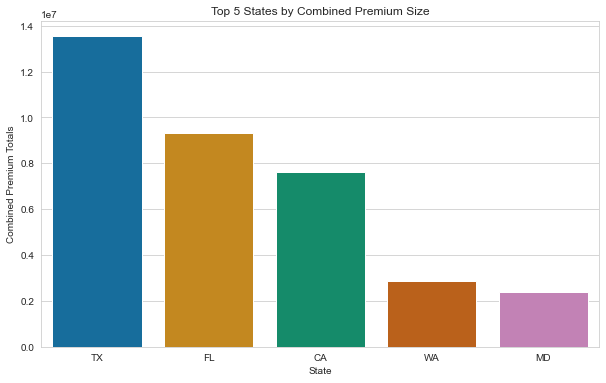

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Combined_Total_Premiums', data=top_states, palette='colorblind')
plt.title('Top 5 States by Combined Premium Size')
plt.xlabel('State')
plt.ylabel('Combined Premium Totals')
plt.show()


In [79]:
# Prepare the dataset for clustering
data_for_clustering = combined_premiums[['Total_Premiums_mak', 'Total_Premiums_cent']]


In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)  # Normalize the data


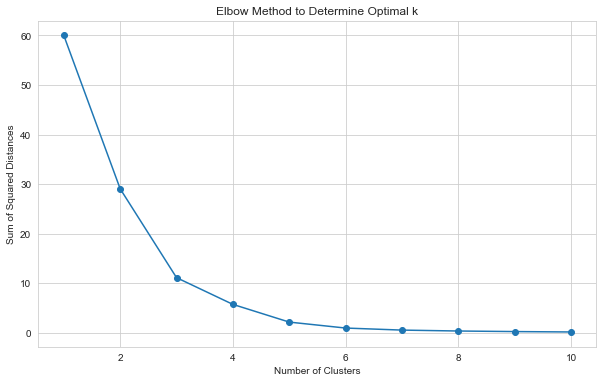

In [81]:
from sklearn.cluster import KMeans

# Calculate SSE for a range of number of cluster
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [82]:
# Optimal k is found to be 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Adding the cluster labels to original DataFrame
combined_premiums['Cluster'] = clusters


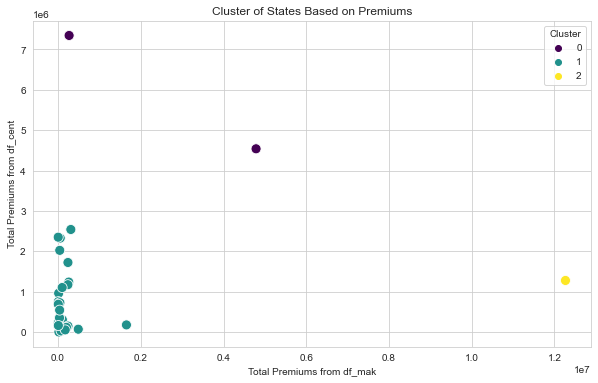

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Premiums_mak', y='Total_Premiums_cent', hue='Cluster', data=combined_premiums, palette='viridis', s=100)
plt.title('Cluster of States Based on Premiums')
plt.xlabel('Total Premiums from df_mak')
plt.ylabel('Total Premiums from df_cent')
plt.legend(title='Cluster')
plt.show()


In [84]:
# Display the DataFrame with cluster labels
clustered_data_display = combined_premiums[['State', 'Total_Premiums_mak', 'Total_Premiums_cent', 'Cluster']]
print(clustered_data_display.sort_values(by='Cluster'))


   State  Total_Premiums_mak  Total_Premiums_cent  Cluster
3     CA              266489           7346257.04        0
6     FL             4785794           4539629.92        0
0     AL              257816           1238891.75        1
27    WA              308209           2541037.03        1
26    VA              238176           1723663.70        1
25    UT              172063             54402.60        1
23    TN               37559            544174.06        1
22    SC              201980            117243.94        1
21    PA                4499            689024.05        1
20    OK               34589            352578.99        1
19    OH               98627           1103586.83        1
18    NV               72209             29441.64        1
17    NM               43754            727536.03        1
16    NC             1652236            177802.75        1
15    MT                2415            159020.51        1
14    MS              487838             71439.83       

In [85]:
# Calculate mean or median values for each cluster
cluster_summary = combined_premiums.groupby('Cluster').agg({
    'Total_Premiums_mak': ['mean', 'median'],
    'Total_Premiums_cent': ['mean', 'median']
}).reset_index()

print(cluster_summary)


  Cluster Total_Premiums_mak             Total_Premiums_cent            
                        mean      median                mean      median
0       0       2.526142e+06   2526141.5        5.942943e+06  5942943.48
1       1       1.633413e+05     43754.0        7.548637e+05   360395.29
2       2       1.226540e+07  12265403.0        1.278610e+06  1278610.47


In [86]:
# Group states by cluster and list them
cluster_details = combined_premiums.groupby('Cluster')['State'].apply(list).reset_index()
print(cluster_details)


   Cluster                                              State
0        0                                           [CA, FL]
1        1  [AL, AR, AZ, CO, DE, GA, ID, IN, LA, MD, MN, M...
2        2                                               [TX]


In [87]:
# Creating a DataFrame with the data
data = {
    'State': ['CA', 'FL', 'AL', 'WA', 'VA', 'UT', 'TN', 'SC', 'PA', 'OK', 'OH', 'NV', 'NM', 'NC', 'MT', 'MS', 'MO', 'MN', 'MD', 'LA', 'IN', 'ID', 'GA', 'DE', 'CO', 'AZ', 'AR', 'WI', 'WV', 'TX'],
    'Total_Premiums_mak': [266489, 4785794, 257816, 308209, 238176, 172063, 37559, 201980, 4499, 34589, 98627, 72209, 43754, 1652236, 2415, 487838, 236867, 33920, 51925, 40140, 6299, 3630, 239041, 19371, 40537, 103800, 13811, 3057, 5848, 12265403],
    'Total_Premiums_cent': [7346257.04, 4539629.92, 1238891.75, 2541037.03, 1723663.70, 54402.60, 544174.06, 117243.94, 689024.05, 352578.99, 1103586.83, 29441.64, 727536.03, 177802.75, 159020.51, 71439.83, 1173813.49, 360395.29, 2328199.81, 2024420.85, 754111.88, 226960.03, 148680.84, 2864.88, 50544.86, 306506.44, 961754.57, 2350503.37, 162721.18, 1278610.47],
    'Cluster': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
}
df = pd.DataFrame(data)

# Group by Cluster and calculate statistics
cluster_summary = df.groupby('Cluster').agg({
    'Total_Premiums_mak': ['mean', 'median', 'sum', 'count'],
    'Total_Premiums_cent': ['mean', 'median', 'sum']
}).reset_index()

print(cluster_summary)


  Cluster Total_Premiums_mak                             Total_Premiums_cent  \
                        mean      median       sum count                mean   
0       0       2.526142e+06   2526141.5   5052283     2        5.942943e+06   
1       1       1.633413e+05     43754.0   4410216    27        7.548637e+05   
2       2       1.226540e+07  12265403.0  12265403     1        1.278610e+06   

                            
       median          sum  
0  5942943.48  11885886.96  
1   360395.29  20381321.20  
2  1278610.47   1278610.47  


Cluster Analysis Summary
Cluster 0

    States: 2
    Mean Premiums (mak): Approximately $2.53 million
    Median Premiums (mak): Approximately $2.53 million
    Total Premiums (mak): Approximately $5.05 million
    Mean Premiums (cent): Approximately $5.94 million
    Median Premiums (cent): Approximately $5.94 million
    Total Premiums (cent): Approximately $11.89 million

Insights: Cluster 0 features states with very high average and median premiums from both datasets. The values are comparatively large, indicating that these states could be major markets with significant insurance activity or premiums volume.
Cluster 1

    States: 27
    Mean Premiums (mak): Approximately $163,341
    Median Premiums (mak): $43,754
    Total Premiums (mak): Approximately $4.41 million
    Mean Premiums (cent): Approximately $754,863
    Median Premiums (cent): $360,395
    Total Premiums (cent): Approximately $20.38 million

Insights: This is the largest cluster by the number of states, featuring relatively lower mean and median premiums compared to Cluster 0. The premiums from df_cent are notably higher on average than those from df_mak, suggesting these might include states with lower direct premiums but higher associated costs or claims.
Cluster 2

    States: 1
    Mean Premiums (mak): Approximately $12.27 million
    Median Premiums (mak): $12.27 million
    Total Premiums (mak): $12.27 million
    Mean Premiums (cent): Approximately $1.28 million
    Median Premiums (cent): $1.28 million
    Total Premiums (cent): $1.28 million

Insights: This cluster includes only one state but shows a very high total in df_mak premiums, massively outstripping the premiums recorded in df_cent. This suggests a unique condition where one type of premium or market activity is very dominant.
Strategic Considerations

Based on this cluster analysis, you might consider the following strategic actions:

    Cluster 0: Focus on retention and enhanced services as these are likely mature markets with significant investment and interest.
    Cluster 1: Investigate the reasons behind lower premiums in df_mak and higher costs or claims in df_cent. There might be opportunities for improving efficiency or adjusting pricing models.
    Cluster 2: Due to its unique profile, further detailed analysis is necessary to understand why such a disparity exists between the two premium types. This state could be a key driver of specific business lines or products.



Performing seaonality analysis:


In [88]:
# Conversion to datetime format 
df_mak['ActivatedAt'] = pd.to_datetime(df_mak['ActivatedAt'])
df_cent['EffectiveDate'] = pd.to_datetime(df_cent['EffectiveDate'])

In [89]:
# Extract year and month for grouping
df_mak['Month'] = df_mak['ActivatedAt'].dt.month
df_cent['Month'] = df_cent['EffectiveDate'].dt.month


In [90]:
# Aggregate Premiums by month in df_mak
monthly_premiums_mak = df_mak.groupby('Month')['Premium'].sum().reset_index()
monthly_premiums_mak.columns = ['Month', 'Total_Premiums_mak']

# Aggregate Contract Costs by month in df_cent
monthly_contract_costs_cent = df_cent.groupby('Month')['ContractCostAmount'].sum().reset_index()
monthly_contract_costs_cent.columns = ['Month', 'Total_ContractCostAmount']



In [91]:
import calendar

# Function to convert month number to name
monthly_premiums_mak['Month'] = monthly_premiums_mak['Month'].apply(lambda x: calendar.month_name[x])
monthly_contract_costs_cent['Month'] = monthly_contract_costs_cent['Month'].apply(lambda x: calendar.month_name[x])


In [92]:
# Display monthly premiums for df_mak
print("Monthly Premiums from df_mak:")
print(monthly_premiums_mak)

# Display monthly contract costs for df_cent
print("\nMonthly Contract Costs from df_cent:")
print(monthly_contract_costs_cent)


Monthly Premiums from df_mak:
        Month  Total_Premiums_mak
0     January             2394129
1    February             1803856
2       March             1980847
3       April             1387377
4         May             1209458
5        June             1414624
6        July              931382
7      August              986629
8   September             2525046
9     October             2466680
10   November             2397812
11   December             2230062

Monthly Contract Costs from df_cent:
        Month  Total_ContractCostAmount
0     January                3247867.34
1    February                3251578.32
2       March                3845634.48
3       April                3581460.88
4         May                3956676.09
5        June                4244025.19
6        July                4497406.13
7      August                4256005.98
8   September                2938492.57
9     October                2725997.67
10   November                3031458.36
11   Decem

In [93]:
# Merge the two datasets on 'Month'
combined_monthly_data = pd.merge(monthly_premiums_mak, monthly_contract_costs_cent, on='Month', how='outer')
print("\nCombined Monthly Data:")
print(combined_monthly_data.sort_values('Month'))



Combined Monthly Data:
        Month  Total_Premiums_mak  Total_ContractCostAmount
3       April             1387377                3581460.88
7      August              986629                4256005.98
11   December             2230062                2828058.42
1    February             1803856                3251578.32
0     January             2394129                3247867.34
6        July              931382                4497406.13
5        June             1414624                4244025.19
2       March             1980847                3845634.48
4         May             1209458                3956676.09
10   November             2397812                3031458.36
9     October             2466680                2725997.67
8   September             2525046                2938492.57


In [94]:
# Add a new column 'Total_Premiums_and_Contracts' which is the sum of premiums and contract costs
combined_monthly_data['Total_Premiums_and_Contracts'] = combined_monthly_data['Total_Premiums_mak'] + combined_monthly_data['Total_ContractCostAmount']


In [95]:
combined_monthly_data.head()

,Month,Total_Premiums_mak,Total_ContractCostAmount,Total_Premiums_and_Contracts
0,January,2394129,3247867.34,5641996.34
1,February,1803856,3251578.32,5055434.32
2,March,1980847,3845634.48,5826481.48
3,April,1387377,3581460.88,4968837.88
4,May,1209458,3956676.09,5166134.09


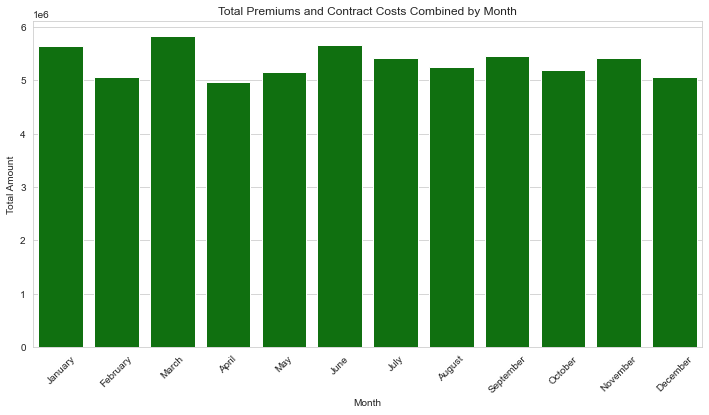

In [96]:
# Set the size and style of the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a bar chart for the combined totals
sns.barplot(data=combined_monthly_data, x='Month', y='Total_Premiums_and_Contracts', color='green')
plt.title('Total Premiums and Contract Costs Combined by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()


Graph shows that there is not much seasonality when viewing premiums as a whole by calenadar month. 

To predict warranty sales in the df_cent dataset based on a synergy with the df_mak dataset premiums, where the premium data could serve as a proxy for market activity or potential sales opportunities, you would set up a predictive model. This model could leverage historical data to identify patterns and project future warranty sales. Below, I outline a structured approach to building this predictive model:

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Preparing features and target
X = combined_monthly_data[['Total_Premiums_mak']]  # Feature matrix
y = combined_monthly_data['Total_ContractCostAmount']  # Target variable

# Optionally scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [98]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [99]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 192693.67075581572
R²: 0.18984687848028303


RMSE: 192693.67075581572

    Magnitude: This RMSE value is quite high, indicating that on average, the model's predictions are about 192,693 units away from the actual contract cost amounts. Whether this is acceptable depends on the typical range or scale of the contract cost amounts in your dataset. If the typical contract costs are significantly higher than the RMSE (e.g., in the millions), this might be relatively minor. However, if they are closer to or lower than this RMSE value, it suggests that the model predictions might not be very accurate.

R²: 0.18984687848028303

    Explanation of Variance: The R² value is quite low, indicating that only about 19% of the variance in the contract costs is explained by the premiums. This suggests that there are other factors not captured by the model that are influencing the contract costs significantly.

In [100]:
# Displaying the coefficient and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

print(f"Coefficient for Total Premiums: {coefficient}")
print(f"Intercept: {intercept}")


Coefficient for Total Premiums: -540484.7328382615
Intercept: 3520569.7262036754


Coefficient Interpretation

    Coefficient for Total Premiums: -540484.7328382615
        This coefficient suggests that for each unit increase in Total_Premiums_mak, the Total_ContractCostAmount decreases by approximately 540,484. This negative relationship is quite significant and implies that higher premiums are associated with lower contract costs.
        The interpretation of this negative relationship could be counterintuitive unless some factors are inversely related within the context of your specific business model. For example, it might indicate that higher premiums deter warranty sales or that in periods or regions with higher premiums, costs associated with contracts are lower due to less frequent claims or better risk management.

    Intercept: 3520569.7262036754
        The intercept of about 3,520,570 represents the estimated Total_ContractCostAmount when Total_Premiums_mak is zero. This value acts as the baseline contract cost amount in the absence of premiums from the df_mak dataset.

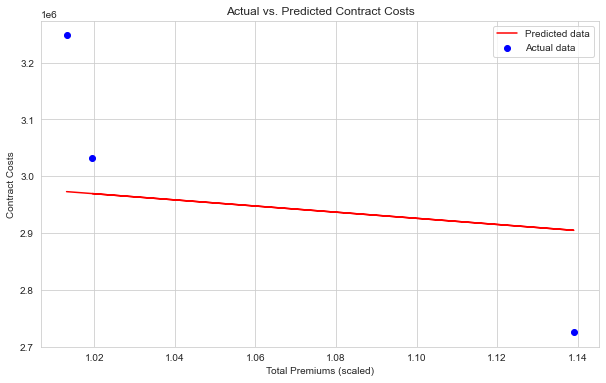

In [101]:
# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Predicted data')
plt.title('Actual vs. Predicted Contract Costs')
plt.xlabel('Total Premiums (scaled)')
plt.ylabel('Contract Costs')
plt.legend()
plt.show()


 Visualizing the relationship between predicted and actual values:

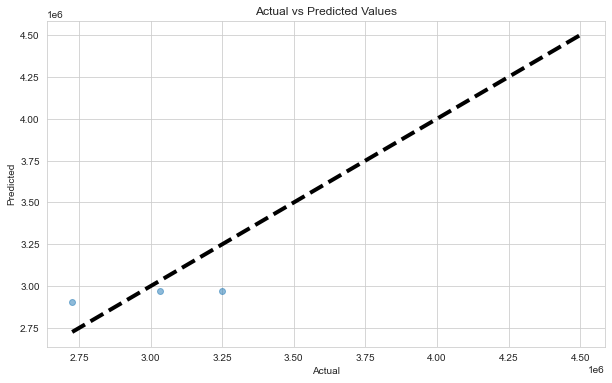

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


Given the results of the model evaluation, the premiums from the builder warranty sales are not usful when trying to predict the warranty sales for the customer appliances. 

Returning focus to the cluster anlaysis, given that the results of the evaluation, Cluster 0 and 2 show the most potential.  

In a given "What If" scenario:  determine highest premium dealer from the customer appliance (cent) dataset by state and highest premium state from the builder data set. 

In [103]:
# Group by 'DealerName' and sum 'ContractCostAmount'
dealer_totals = df_cent.groupby('DealerName')['ContractCostAmount'].sum().reset_index()


In [104]:
# Sort the DataFrame by 'ContractCostAmount' in descending order
dealer_totals_sorted = dealer_totals.sort_values(by='ContractCostAmount', ascending=False)


In [105]:
# Print the sorted DataFrame
print(dealer_totals_sorted)


                        DealerName  ContractCostAmount
9           AIRPORT HOME APPLIANCE          4810079.27
77               BRAY & SCARFF INC          3324979.33
249                   JUDD & BLACK          2191886.49
179          GOOD DEALS APPLIANCES          1859787.95
381                   ROSNER'S INC          1417878.77
..                             ...                 ...
394  SANDPOINT TV AND APPLIANCE CO               57.04
449             THORPES APPLIANCES               57.04
213         HINNS HOME FURNISHINGS               54.34
145  EAST TEXAS MATTRESS WAREHOUSE               51.41
310                     MERLINS TV               32.06

[508 rows x 2 columns]


In [106]:
# Group by 'DealerName' and 'StateCode' and sum 'ContractCostAmount'
dealer_state_totals = df_cent.groupby(['DealerName', 'StateCode'])['ContractCostAmount'].sum().reset_index()


In [107]:
# Sum contract costs by dealer only to identify the top 5 dealers
dealer_totals = df_cent.groupby('DealerName')['ContractCostAmount'].sum().reset_index()
top_5_dealers = dealer_totals.nlargest(5, 'ContractCostAmount')['DealerName']


In [108]:
# Filter the dealer_state_totals to include only top 5 dealers
top_dealers_by_state = dealer_state_totals[dealer_state_totals['DealerName'].isin(top_5_dealers)]

# Aggregate the filtered data by State
state_totals_top_dealers = top_dealers_by_state.groupby('StateCode')['ContractCostAmount'].sum().reset_index()


In [109]:
# Sort the state totals from largest to smallest
sorted_state_totals = state_totals_top_dealers.sort_values(by='ContractCostAmount', ascending=False)


In [110]:
# Print the sorted DataFrame
sorted_state_totals.head(5)


,StateCode,ContractCostAmount
3,CA,4800724.79
7,FL,3275556.65
32,WA,2191203.26
16,MD,1895951.95
31,VA,1169988.97


We know from the 2 datasets that the state of Florida is the synergistic state according to amount of premiums sold for both companies. 

In [111]:
# Filter for entries from Florida in both datasets
df_mak_florida = df_mak[df_mak['StateId'] == 'FL']
df_cent_florida = df_cent[df_cent['StateCode'] == 'FL']


In [112]:
# Aggregate total premiums by builder in Florida from df_mak
florida_builders = df_mak_florida.groupby('Company Name')['Premium'].sum().reset_index()

# Aggregate total contract costs by dealer in Florida from df_cent
florida_dealers = df_cent_florida.groupby('DealerName')['ContractCostAmount'].sum().reset_index()


In [113]:
# Find the largest builder based on total premiums
largest_builder = florida_builders.loc[florida_builders['Premium'].idxmax()]

# Find the largest dealer based on total contract costs
largest_dealer = florida_dealers.loc[florida_dealers['ContractCostAmount'].idxmax()]


In [114]:
# Print the largest builder and dealer
print("Largest Builder in Florida based on Premiums:")
print(largest_builder)

print("\nLargest Dealer in Florida based on Contract Costs:")
print(largest_dealer)


Largest Builder in Florida based on Premiums:
Company Name    Holiday Builders, Inc. 
Premium                          490456
Name: 120, dtype: object

Largest Dealer in Florida based on Contract Costs:
DealerName            GOOD DEALS APPLIANCES
ContractCostAmount               1857578.06
Name: 5, dtype: object


In [115]:
# Calculate the average of the Premium column
average_premium = df_mak['Premium'].mean()
print("Average Premium:", average_premium)


Average Premium: 540.6161080838993


With the average premium of $540 we can assume that is a potential of 908 homes.  

In [116]:
# Calculate the average of the Premium column
average_premium = df_cent['ContractCostAmount'].mean()
print("Average Contract:", average_premium)

Average Contract: 75.45823637541326


If we apply the assumption of 908 homes at an average contract price of $75*3 appliances = $ 204,300 in net contract premium increase if a relationship can be made between the builder and the appliance sales within the homes built. 

1. Targeted Marketing and Sales Efforts

    Holiday Builders, Inc.: Develop customized marketing strategies or incentive plans aimed at increasing the volume of business with this builder. Consider tailoring products or services to better meet their needs or offering bulk discounts to secure more premium volume.
    GOOD DEALS APPLIANCES: Explore partnerships or exclusive deals that might be attractive to this dealer, given their significant role in the market. This could involve specialized warranty plans or service agreements that cater specifically to their customer base.

2. Relationship Building

    Strengthen Relationships: Engage directly with the decision-makers at Holiday Builders, Inc., and GOOD DEALS APPLIANCES to understand their needs, expectations, and how your offerings can better serve their requirements. Strengthening these relationships can lead to more favorable terms and increased business.
    Customized Offers: Based on the insights gained from interactions, develop customized offers or services that align with their current demands and future needs.

3. Market Analysis

    Competitor Analysis: Investigate what competitors might be offering these companies and devise strategies to offer superior value.
    Market Share and Penetration: Assess the market share of these entities in their respective sectors and explore ways to enhance it through joint ventures or co-marketing initiatives.

4. Operational Adjustments

    Logistics and Supply Chain: For GOOD DEALS APPLIANCES, examine the logistics and supply chain efficiency to ensure that service delivery and product availability align with their business scale and demands.
    Feedback and Product Development: Utilize feedback from these major players to adjust product or service offerings, which could lead to better market fit and customer satisfaction.

5. Financial Planning

    Investment and Budgeting: Allocate marketing and sales budgets effectively to focus more intensively on these high-value customers. Consider investments in dedicated support teams or account managers to handle their needs.
    Risk Management: Understand the risks associated with relying significantly on major players and consider strategies to diversify your client base to manage these risks effectively.